# Analysis of the data set

The aim is to determine the maximum number of objects with different identifications within the data set.

The annotations are masks that are used for semantic segmentation. It is the targets that are needed to train a neural network. These masks mark objects in relation to an original image. To differentiate between the objects, each mask object has an object-specific identification number (class number) with consecutive numbering starting with 1. The background itself is given the number 0.

The object classification by means of a neural network (semantic instance segmentation) requires the number of maximum output channels as a parameter. The mask objects provide information about this.

In this project section, the mask images are analyzed in order to determine the maximum number of possible object types.

### Set up Google Colab

In [1]:
from google.colab import drive

drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### In das Projektverzeichnis 

In [2]:
cd drive/MyDrive/BA_SemanticSegmentation_JonasHeinke/___P7_Eigenes_Projekt_Segmentation_QU/

/content/drive/MyDrive/BA_SemanticSegmentation_JonasHeinke/___P7_Eigenes_Projekt_Segmentation_QU


In [3]:
ls

configuration_QU.py                   P7-04_prognose_QU.ipynb
models/                               P7-05_result_visualization_QU.ipynb
MODULE/                               __pycache__/
P7-01_dataset_visualization_QU.ipynb  results/
P7-03_training_QU.ipynb               results_B/


## Libraries, modules, classes

In [5]:
# library, module
from skimage.color import rgb2gray
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import ndimage
import pathlib
import glob
import os
from skimage.io import imread
import importlib # zum aktualisieren von Bibliotheken
from skimage.transform import resize
# --------------------------
from configuration_QU import Path   as PATH   # Pfade und Dateinamen

## Constants

In [ ]:
# Veranlasst Ausgaben 
VERBOSE=True

## Create file names as a list
A path for the images and a path for the associated masks are selected.

In [ ]:
path=PATH() # Instanz der Klasse für Methodenaufruf erforderlich
path_images=path.trainimages
path_masks=path.trainmasks
imgfilter= ['train_??.bmp',       'testA_??.bmp',     'testB_??.bmp']
maskfilter=['train_??_anno.bmp', 'testA_??_anno.bmp', 'testB_??_anno.bmp']
dataset=0
# input and target files -TRAIN[0], TESTA[1], TESTB[2]
image_filenames = path.get_filenames(path_images, dateifilter= imgfilter[dataset],  sort=True)
mask_filenames  = path.get_filenames(path_masks,  dateifilter= maskfilter[dataset], sort=True)
if VERBOSE:
    print(path_images)
    print(path_masks)

/content/drive/.shortcut-targets-by-id/1i0GOg0AT_UuZJJUMz0D46PD2S2VfYbPB/NN_Segmentation/BA_Semantische_Segmentation/_Skript_Projekte/___P7_Eigenes_Projekt_Segmentation_QU/Warwick QU Dataset (Released 2016_07_08)
/content/drive/.shortcut-targets-by-id/1i0GOg0AT_UuZJJUMz0D46PD2S2VfYbPB/NN_Segmentation/BA_Semantische_Segmentation/_Skript_Projekte/___P7_Eigenes_Projekt_Segmentation_QU/Warwick QU Dataset (Released 2016_07_08)


In [ ]:
print('Anzahl der Bild-Masken-Paare: ',len(image_filenames),' : ', len(mask_filenames))
if VERBOSE:
    for idx in range(len(image_filenames)):
        # print(os.path.basename(images_names[idx]),' | ', os.path.basename(targets_names[idx]))
        print(idx, ' | ', os.path.basename(image_filenames[idx]),'\t\t-> ', os.path.basename(mask_filenames[idx]))

Anzahl der Bild-Masken-Paare:  85  :  85
0  |  train_01.bmp 		->  train_01_anno.bmp
1  |  train_02.bmp 		->  train_02_anno.bmp
2  |  train_03.bmp 		->  train_03_anno.bmp
3  |  train_04.bmp 		->  train_04_anno.bmp
4  |  train_05.bmp 		->  train_05_anno.bmp
5  |  train_06.bmp 		->  train_06_anno.bmp
6  |  train_07.bmp 		->  train_07_anno.bmp
7  |  train_08.bmp 		->  train_08_anno.bmp
8  |  train_09.bmp 		->  train_09_anno.bmp
9  |  train_10.bmp 		->  train_10_anno.bmp
10  |  train_11.bmp 		->  train_11_anno.bmp
11  |  train_12.bmp 		->  train_12_anno.bmp
12  |  train_13.bmp 		->  train_13_anno.bmp
13  |  train_14.bmp 		->  train_14_anno.bmp
14  |  train_15.bmp 		->  train_15_anno.bmp
15  |  train_16.bmp 		->  train_16_anno.bmp
16  |  train_17.bmp 		->  train_17_anno.bmp
17  |  train_18.bmp 		->  train_18_anno.bmp
18  |  train_19.bmp 		->  train_19_anno.bmp
19  |  train_20.bmp 		->  train_20_anno.bmp
20  |  train_21.bmp 		->  train_21_anno.bmp
21  |  train_22.bmp 		->  train_22_anno.bmp
2

## Loading the images and the associated masks from the directories

In [ ]:
# read images and store them in memory
images = [imread(img_name) for img_name in image_filenames]
masks = [imread(mask_name) for mask_name in mask_filenames]

In [ ]:
if VERBOSE:    
    print('path_images: ', path_images)
    print('path_masks : ', path_masks)
    # print(targets_names)
    print('Anzahl der Bilder: inputs {}, targets {} '.format(len(images), len(masks)))
    print('Shape of origin: inputs {}, targets {} '.format(images[0].shape, masks[0].shape))

path_images:  /content/drive/.shortcut-targets-by-id/1i0GOg0AT_UuZJJUMz0D46PD2S2VfYbPB/NN_Segmentation/BA_Semantische_Segmentation/_Skript_Projekte/___P7_Eigenes_Projekt_Segmentation_QU/Warwick QU Dataset (Released 2016_07_08)
path_masks :  /content/drive/.shortcut-targets-by-id/1i0GOg0AT_UuZJJUMz0D46PD2S2VfYbPB/NN_Segmentation/BA_Semantische_Segmentation/_Skript_Projekte/___P7_Eigenes_Projekt_Segmentation_QU/Warwick QU Dataset (Released 2016_07_08)
Anzahl der Bilder: inputs 85, targets 85 
Shape of origin: inputs (522, 775, 3), targets (522, 775) 


## Determination of the number of objects in a mask

In [ ]:
max_class_of_all=0
max_idx=[]
for i in range(len(masks)):
    max_idx.append(masks[i].max())
print(max_idx)

[7, 5, 19, 6, 9, 5, 4, 17, 23, 6, 2, 16, 16, 1, 4, 6, 12, 8, 9, 16, 5, 28, 5, 4, 20, 2, 8, 6, 5, 4, 8, 6, 30, 6, 5, 2, 12, 7, 10, 2, 8, 6, 8, 5, 11, 14, 3, 4, 5, 4, 26, 5, 19, 10, 5, 5, 4, 10, 16, 9, 12, 8, 15, 1, 4, 5, 3, 11, 24, 6, 8, 19, 11, 8, 9, 2, 5, 7, 17, 7, 3, 12, 7, 8, 14]


In [ ]:
max_idx_all=max(max_idx)
idx_of_max= np.argmax(max_idx)
print('Maximum number of classes or number of object IDs:\n Max= {}[idx={}]: '.
      format(max_idx_all,idx_of_max ))    

Maximum number of classes or number of object IDs:
 Max= 30[idx=32]: 


## Visualization

##### Histograms

In [ ]:
from MODULE.JH.visualize import Show as SHOW
show=SHOW(experiment='', figsize=(60,70), fontsize=16)

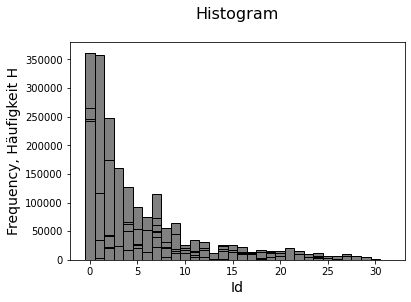

In [ ]:
#histogramms=[]
histogramm=[show.histogramm(mask,f'(7-1)_Summ_histogram_{maskfilter[dataset][:5]}',\
                            ordinate='Frequency, Häufigkeit H', relativ=False)\
            for mask in masks]

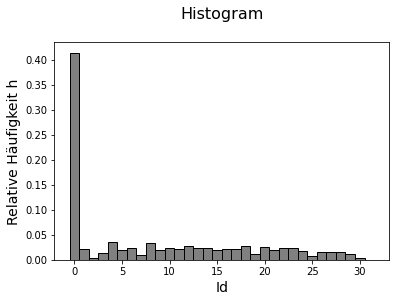

In [ ]:
histogramm=show.histogramm(masks[idx_of_max],f'(7-1)_Histogramm_{maskfilter[dataset][:5]}_({idx_of_max})',\
                            ordinate='Relative Häufigkeit h', relativ=True)

#### Images and masks

In [ ]:
show=SHOW(experiment='', figsize=(40,18), fontsize=40)
idx_list=[10, 20, 32]
path_set= f'(7-1)_images_masks_listset_{maskfilter[dataset][:5]}_{str(idx_list)}.png'
listset=list([images, masks])
titles=list(['Image', 'Actual masks'])
show.list_set(idx_list, listset,titles, path=path_set)

In [ ]:
print('ENDE')

ENDE
